<a href="https://colab.research.google.com/github/sajiaakhter/mec-mini-projects/blob/master/mec_16_2_6_clustering_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd

data_offer = pd.read_excel('https://raw.githubusercontent.com/sajiaakhter/mec-mini-projects/master/WineKMC.xlsx', sheet_name=0)
data_offer.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
print(data_offer.head())


   offer_id  campaign            varietal  min_qty  discount       origin  \
0         1   January              Malbec       72        56       France   
1         2   January          Pinot Noir       72        17       France   
2         3  February           Espumante      144        32       Oregon   
3         4  February           Champagne       72        48       France   
4         5  February  Cabernet Sauvignon      144        44  New Zealand   

   past_peak  
0      False  
1      False  
2       True  
3       True  
4       True  


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [46]:
data_tran = pd.read_excel('https://raw.githubusercontent.com/sajiaakhter/mec-mini-projects/master/WineKMC.xlsx', sheet_name=1)
data_tran.columns = ["customer_name", "offer_id"]
data_tran['n'] = 1
print(data_tran.head())

  customer_name  offer_id  n
0         Smith         2  1
1         Smith        24  1
2       Johnson        17  1
3       Johnson        24  1
4       Johnson        26  1


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


**Checkup Exercise Set I**
Exercise: Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):

customer_name
One column for each offer, with a 1 if the customer responded to the offer
Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.


In [48]:
df = pd.merge(data_offer,data_tran)
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
matrix = matrix.fillna(0).reset_index()


**Checkup Exercise Set II**
Exercise:

What values of  do you believe represent better clusterings? Why?
Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums)

Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix.

Construct a plot showing  for each  and pick  using this plot. For simplicity, test .

Make a bar chart showing the number of points in each cluster for k-means under the best .

What challenges did you experience using the Elbow method to pick ?

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype='object', name='offer_id')


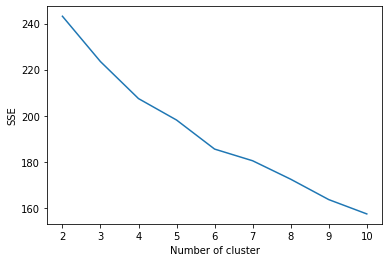

<BarContainer object of 5 artists>

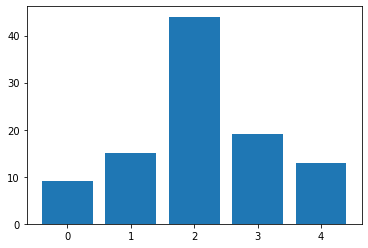

In [49]:
x_cols = matrix.columns[1:]
print(x_cols)

from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

ss = {}

for i in range(2,11):
  cluster = KMeans(n_clusters=i,random_state = 4,max_iter=300).fit(matrix[matrix.columns[2:]])
  ss[i] = cluster.inertia_
  

plt.figure()
plt.plot(list(ss.keys()), list(ss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

matrix['cluster'] = KMeans(n_clusters=5).fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()
plt.bar(matrix.cluster.value_counts().index,matrix.cluster.value_counts().values)



**Checkup Exercise Set III**
Exercise: Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.

Exercise: Compute the average silhouette score for each  and plot it. What  does the plot suggest we should choose? Does it differ from what we found using the Elbow method?


In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
old_mat = matrix
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
#matrix = matrix.reset_index()

customer_clusters = matrix[['customer_name', 'cluster', 'x', 'y']]
#customer_clusters.head()

df = pd.merge(data_tran, customer_clusters)
df = pd.merge(data_offer, df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 2 The average silhouette_score is : 0.2601185048887644


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 3 The average silhouette_score is : 0.2405153575169819


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 4 The average silhouette_score is : 0.2703044516016447


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 5 The average silhouette_score is : 0.24438922879798178


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 6 The average silhouette_score is : 0.21770283411131408


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 7 The average silhouette_score is : 0.20865308180714806


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 8 The average silhouette_score is : 0.1834841587907938


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 9 The average silhouette_score is : 0.18796277155318125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For n_clusters = 10 The average silhouette_score is : 0.16897502390668928


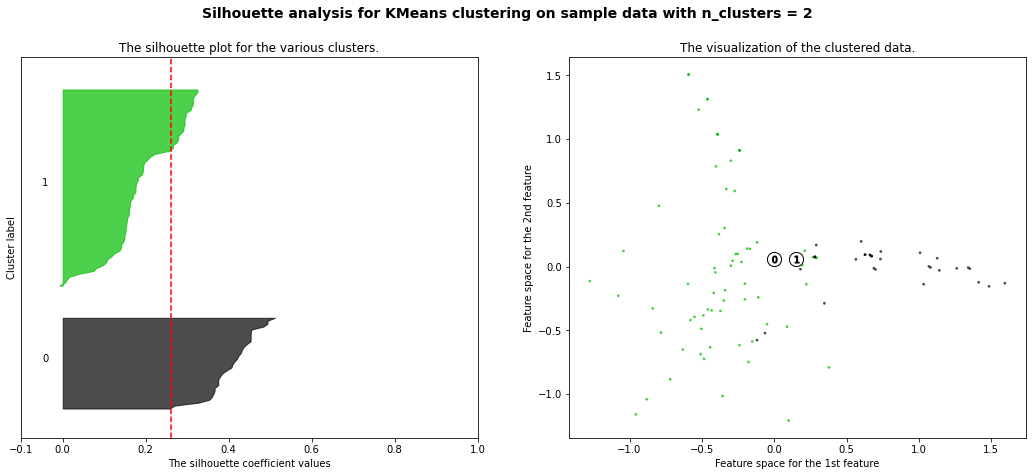

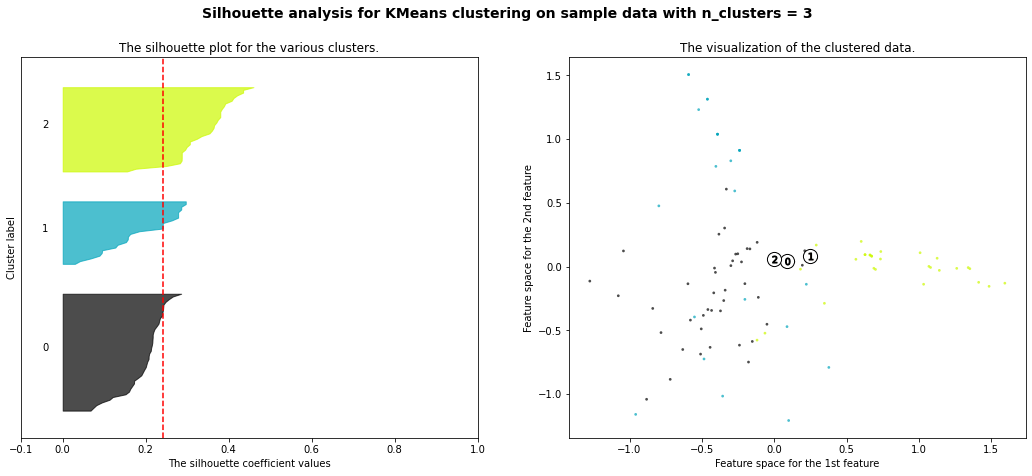

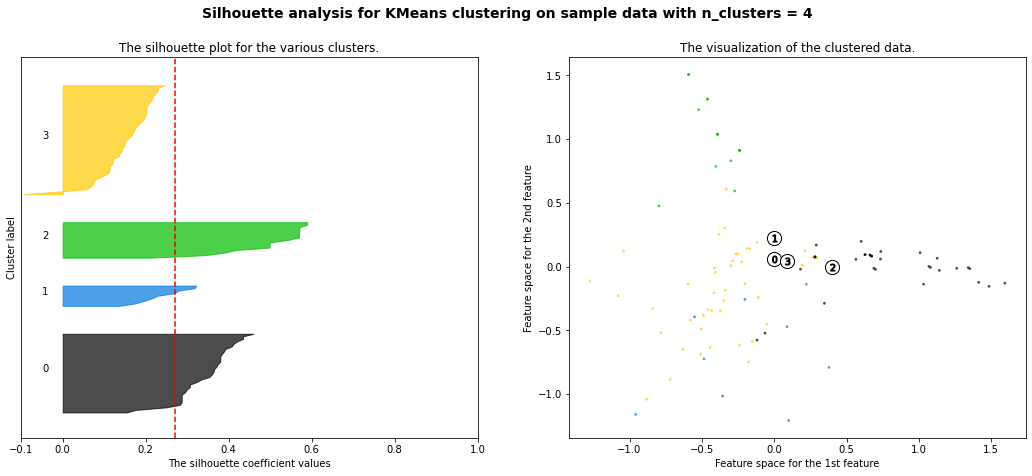

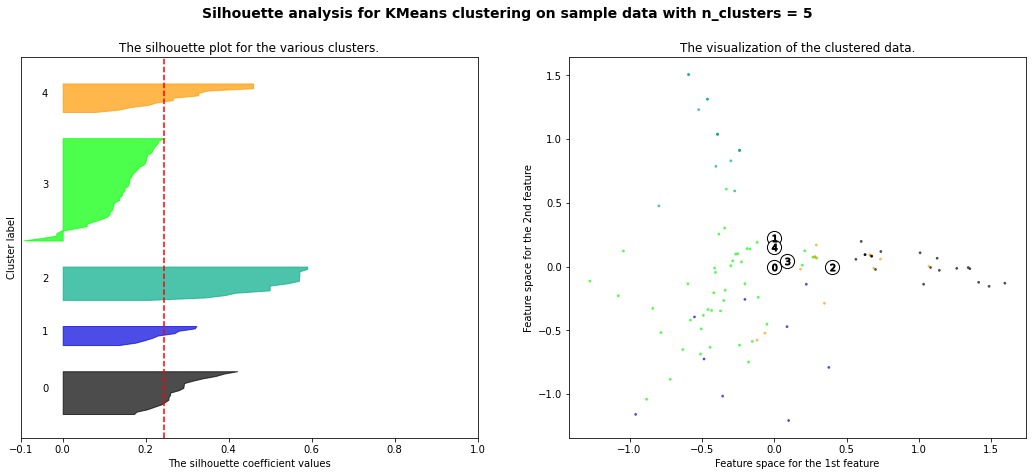

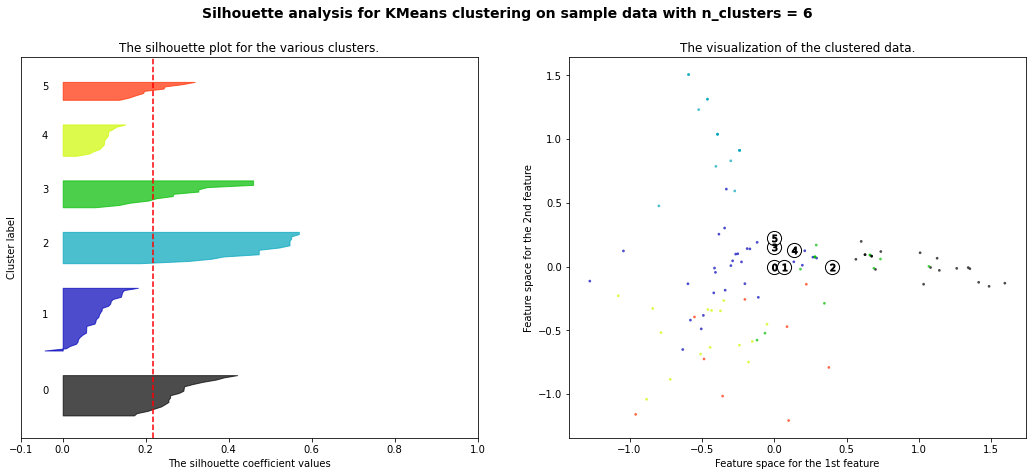

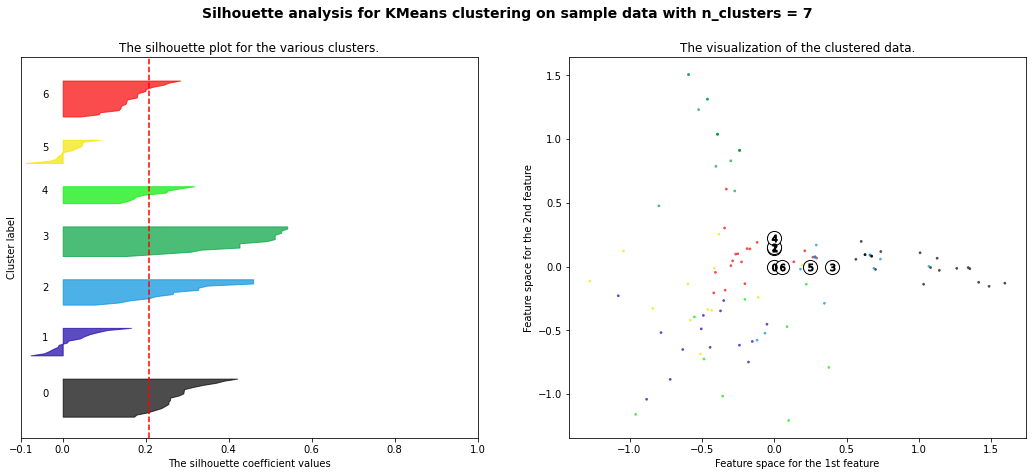

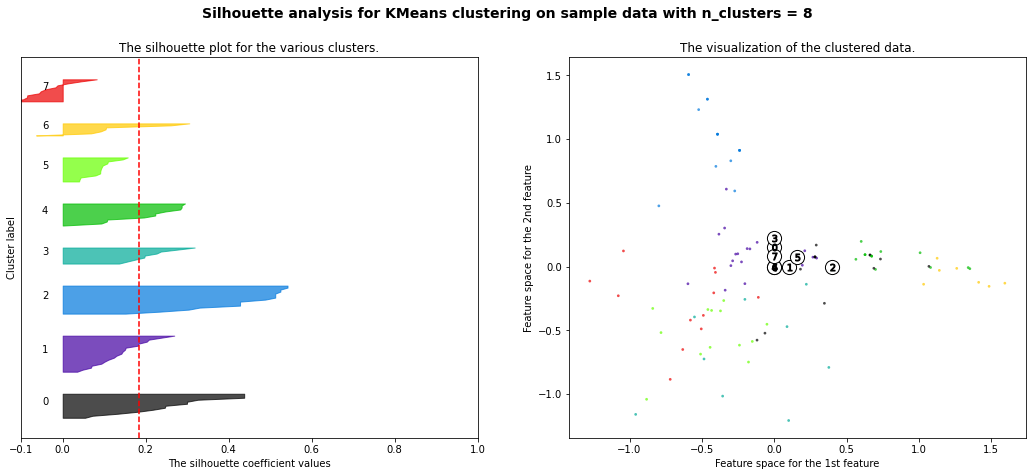

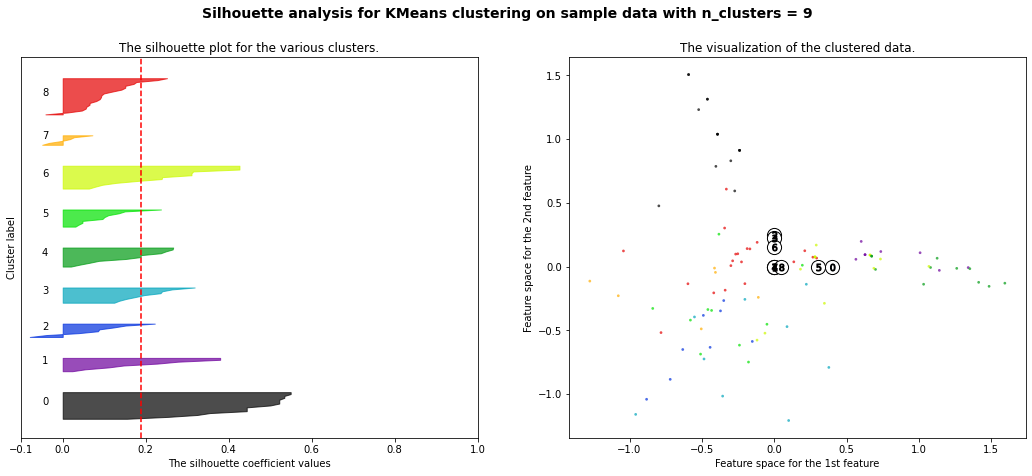

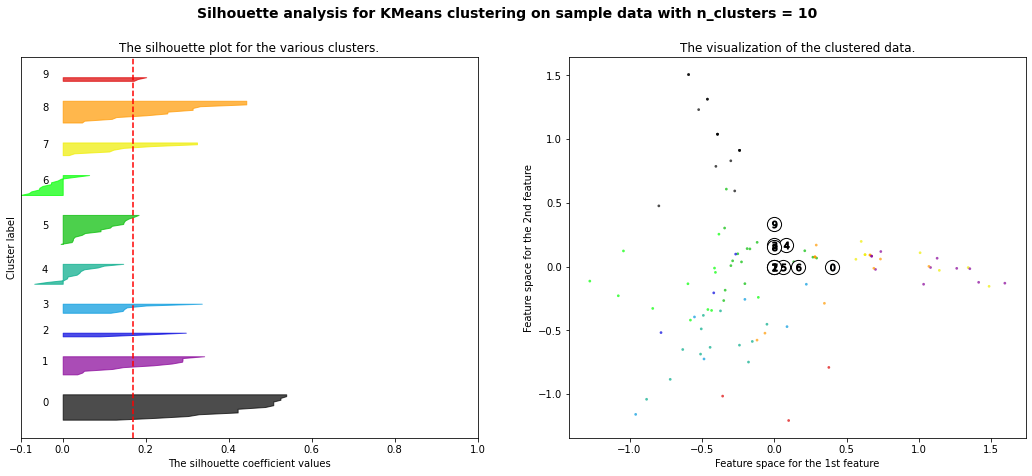

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

for i in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    X = old_mat[old_mat.columns[2:]]
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (i + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=i,random_state = 10)
    cluster = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster)

    y_lower = 10
    for j in range(i):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster.astype(float) / i)
    ax2.scatter(
        matrix['x'],matrix['y'], marker=".", s=30, lw=0, alpha=0.7,c=colors,  edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for l, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % l, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % i,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


Checkup Exercise Set IV
Exercise: Use PCA to plot your clusters:


In [ ]:
!pip install ggplot


In [60]:
from ggplot import *

#ggplot(df, aes(x='x', y='y', color='cluster')) + geom_point(size=75) + ggtitle("Customers Grouped by Cluster")

cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y'])
cluster_centers['cluster'] = range(0, len(cluster_centers))

ggplot(df, aes(x='x', y='y', color='cluster')) + \
 geom_point(size=75) + \
 geom_point(cluster_centers, size=500) +\
 ggtitle("Customers Grouped by Cluster")

AttributeError: ignored